In [1]:
#!pip install keras-tuner

In [2]:
from data_creation import DataSelection
from prediction_LSTM import SolarLSTM
import pickle

In [3]:
# with open("/content/all_data.pkl", "rb") as file:
#     data = pickle.load(file)

# DataSelection(data, 2014, "./")
# # DataSelection(data, 2015, "./")

In [4]:
import numpy as np

In [5]:
data2014 = np.load("data_2014.npy")
labels2014 = np.load("labels_2014.npy")

In [6]:
# data2014.shape[0] % 64

In [7]:
# # Need to adjust data size to ensure that each batch is of size 64
# adjusted_data = data2014[:data2014.shape[0]-18, :, :]
# adjusted_labels = labels2014[:labels2014.shape[0]-18, :, :]

In [8]:
base_model = SolarLSTM(data2014, labels2014, save_path="./")

In [9]:
base_model.build_model()

In [10]:
base_model.model

Epoch 1/50


C:\Users\Dave\.conda\envs\dlproj\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - ETA: 0s - loss: 0.6602 - accuracy: 0.6061 - mse: 0.2338 - mae: 0.4676

INFO:tensorflow:Assets written to: model_checkpoints\assets


INFO:tensorflow:Assets written to: model_checkpoints\assets


86/86 [==============================] - 41s 442ms/step - loss: 0.6602 - accuracy: 0.6061 - mse: 0.2338 - mae: 0.4676 - val_loss: 0.6550 - val_accuracy: 0.6379 - val_mse: 0.2312 - val_mae: 0.4484
Epoch 2/50
86/86 [==============================] - 31s 365ms/step - loss: 0.6265 - accuracy: 0.6701 - mse: 0.2174 - mae: 0.4366 - val_loss: 0.6602 - val_accuracy: 0.6377 - val_mse: 0.2335 - val_mae: 0.4404
Epoch 2: early stopping


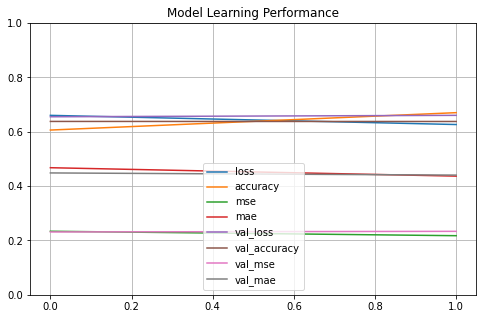

In [11]:
history=base_model.fit()

In [12]:
data2015 = np.load("data_2015.npy")
labels2015 = np.load("labels_2015.npy")

In [13]:
data2015.shape

(107666, 120, 38)

In [14]:
data_new = base_model.batch_prefetch_data(data2015,labels2015,split_data=False)
base_model.evaluate(data_new)
#base_model.evaluate(data_new,labels_new)

107/107 [==============================] - 17s 142ms/step - loss: 0.5674 - accuracy: 0.7443 - mse: 0.1900 - mae: 0.3954


[0.5673945546150208,
 0.7442816495895386,
 0.19000007212162018,
 0.39536383748054504]

In [15]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = base_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%base_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix = base_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [16]:
#If you want to customize the confusion matrix plot, can uncomment below and use the plot handle below
#conf_plt_handle=base_model.plot_confusion_matrix(conf_matrix)

array([[9168588,    6372],
       [3276088,  388952]], dtype=int64)

In [20]:
conf_matrix

array([[9168588,    6372],
       [3276088,  388952]], dtype=int64)